In [1]:
import baseball

### All game information can be returned in a single object

In [2]:
game_id, game = baseball.get_game_from_url('11-1-2017', 'HOU', 'LAD', 1)

#### Individual inning:

In [3]:
game.inning_list[0]

-------------------------------- TOP OF INNING --------------------------------
InningStatsTuple(S=18, P=24, BB=0, K=0, LOB=0, E=1, H=1, R=2)
[
 Scorecard:      2B
 Hit location:   L7
 Pitcher:        21 Yu Darvish
 Batter:          4 George Springer
 Got on base:    True
 Fielding Error: None
 Out Runners:    []
 Scoring Runners:[]
 Runs Batted In: []
 Inning Outs:    0
 Summary:        Double
 Description:    George Springer doubles (3) on a line drive to left fielder Joc
                 Pederson.
 Events:
     - Pitch:                Ball                FF    96.0    (155.47, 160.83)
     - Pitch:                Called Strike       FC    83.9    (107.00, 171.09)
     - Pitch:                In play, no out     SL    83.9    (115.36, 183.10)
     -  4 George Springer:   Double                --->2B                      
, 
 Scorecard:      E3
 Hit location:   E3
 Pitcher:        21 Yu Darvish
 Batter:          2 Alex Bregman
 Got on base:    False
 Fielding Error: E3
 Out Runners:  

#### Plate appearance:

In [4]:
game.inning_list[0].top_half_appearance_list[0]


 Scorecard:      2B
 Hit location:   L7
 Pitcher:        21 Yu Darvish
 Batter:          4 George Springer
 Got on base:    True
 Fielding Error: None
 Out Runners:    []
 Scoring Runners:[]
 Runs Batted In: []
 Inning Outs:    0
 Summary:        Double
 Description:    George Springer doubles (3) on a line drive to left fielder Joc
                 Pederson.
 Events:
     - Pitch:                Ball                FF    96.0    (155.47, 160.83)
     - Pitch:                Called Strike       FC    83.9    (107.00, 171.09)
     - Pitch:                In play, no out     SL    83.9    (115.36, 183.10)
     -  4 George Springer:   Double                --->2B                      

#### Plate appearance event list:

In [5]:
game.inning_list[0].top_half_appearance_list[0].event_list[0]

- Pitch:                Ball                FF    96.0    (155.47, 160.83)

### Analyze a game

In [6]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib

%matplotlib inline

In [7]:
pitch_tuple_list = []
for inning in game.inning_list:
    for appearance in inning.top_half_appearance_list:
        for event in appearance.event_list:
            if isinstance(event, baseball.Pitch):
                pitch_tuple_list.append(
                    (str(appearance.pitcher), 
                     event.pitch_description,
                     event.pitch_position,
                     event.pitch_speed,
                     event.pitch_type)
                )

In [8]:
data = pd.DataFrame(data=pitch_tuple_list, columns=['Pitcher', 'Pitch Description', 'Pitch Coordinate', 'Pitch Speed', 'Pitch Type'])
data

,Pitcher,Pitch Description,Pitch Coordinate,Pitch Speed,Pitch Type
0,21 Yu Darvish,Ball,"(155.47, 160.83)",96.0,FF
1,21 Yu Darvish,Called Strike,"(107.0, 171.09)",83.9,FC
2,21 Yu Darvish,"In play, no out","(115.36, 183.1)",83.9,SL
3,21 Yu Darvish,"In play, run(s)","(80.06, 168.03)",96.6,FF
4,21 Yu Darvish,Ball,"(54.1, 216.52)",84.6,SL
5,21 Yu Darvish,Called Strike,"(130.07, 187.18)",84.5,SL
6,21 Yu Darvish,Ball In Dirt,"(60.62, 0.0)",75.0,CU
7,21 Yu Darvish,"In play, run(s)","(58.63, 173.43)",84.7,SL
8,21 Yu Darvish,Swinging Strike,"(100.96, 184.09)",95.7,FF
9,21 Yu Darvish,Called Strike,"(127.58, 185.75)",84.7,SL


In [9]:
data['Pitcher'].value_counts()

22 Clayton Kershaw    51
21 Yu Darvish         47
57 Alex Wood          25
74 Kenley Jansen      20
17 Brandon Morrow      3
Name: Pitcher, dtype: int64

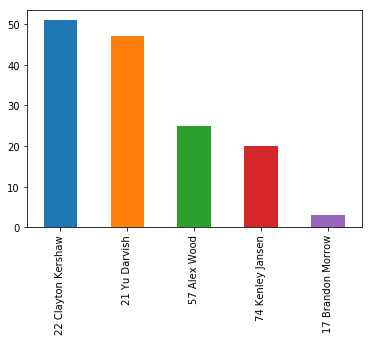

In [10]:
data['Pitcher'].value_counts().plot.bar()

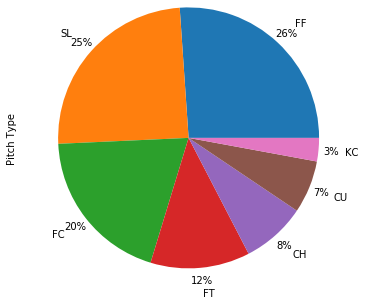

In [11]:
plt.axis('equal')
data['Pitch Type'].value_counts().plot(kind='pie', radius=1.5, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

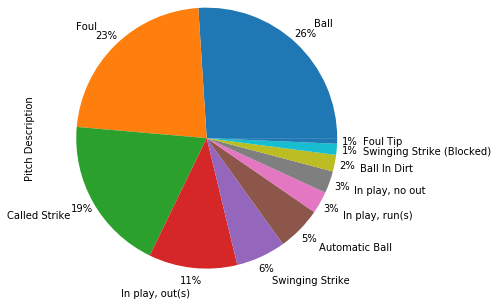

In [12]:
plt.axis('equal')
data['Pitch Description'].value_counts().plot(kind='pie', radius=1.5, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10a236cc0>]], dtype=object)

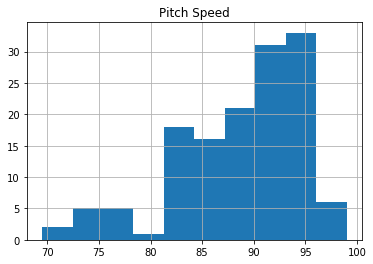

In [13]:
data.dropna(inplace=True)
data.count()
data.hist()

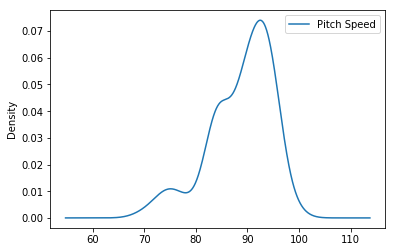

In [14]:
data.plot.kde()

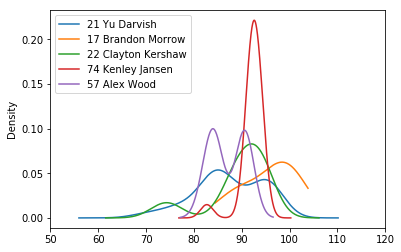

In [15]:
fig, ax = plt.subplots()
ax.set_xlim(50, 120)
for pitcher in data['Pitcher'].unique():
    s = data[data['Pitcher'] == pitcher]['Pitch Speed']
    s.plot.kde(ax=ax, label=pitcher)

ax.legend()

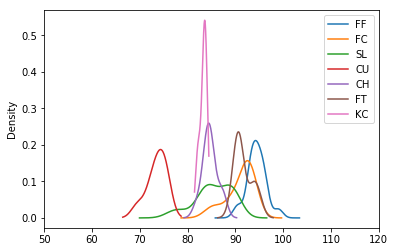

In [16]:
fig, ax = plt.subplots()
ax.set_xlim(50, 120)
for desc in data['Pitch Type'].unique():
    s = data[data['Pitch Type'] == desc]['Pitch Speed']
    s.plot.kde(ax=ax, label=desc)

ax.legend()

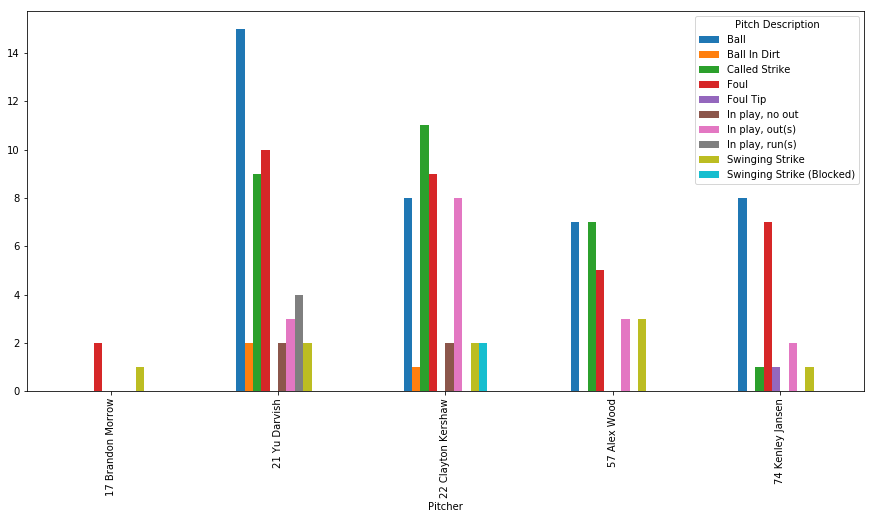

In [17]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Pitcher', 'Pitch Description']).size().unstack().plot.bar(ax=ax)

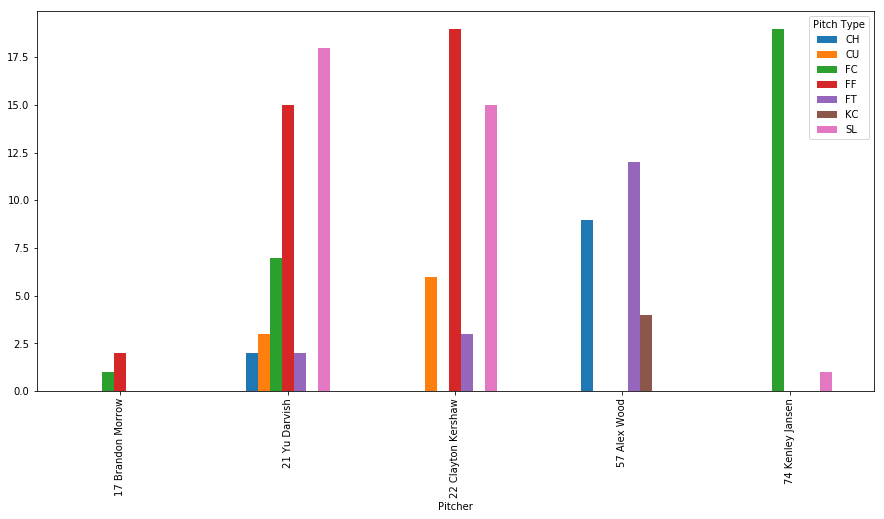

In [19]:
fig, ax = plt.subplots(figsize=(15,7))
data.groupby(['Pitcher', 'Pitch Type']).size().unstack().plot.bar(ax=ax)

In [20]:
list(game.home_pitcher_box_score_dict)

[21 Yu Darvish,
 17 Brandon Morrow,
 22 Clayton Kershaw,
 74 Kenley Jansen,
 57 Alex Wood]

In [21]:
kenley_jansen = list(game.home_pitcher_box_score_dict)[3]

In [22]:
game.home_pitcher_box_score_dict[kenley_jansen]

PitcherBoxScore(IP=1.0, WLS='', BF=4, H=0, R=0, ER=0, SO=1, BB=1, IBB=0, HBP=0, BLK=0, WP=0, HR=0, S=12, P=20, ERA=0.0, WHIP=1.0)

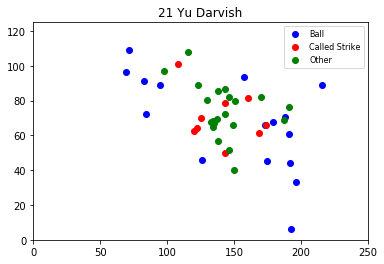

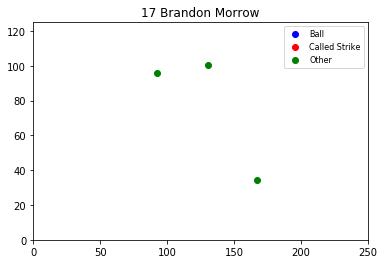

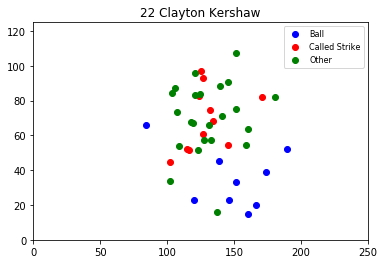

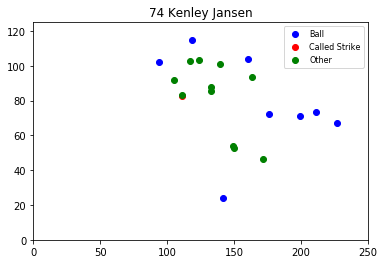

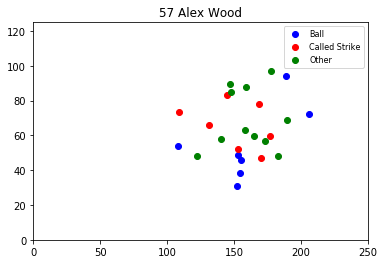

In [23]:
for pitcher in data['Pitcher'].unique():
    plt.ylim(0, 125)
    plt.xlim(0, 250)
    bx = [250 - x[2][0] for x in pitch_tuple_list if x[0] == pitcher if 'Ball' in x[1]]
    by = [250 - x[2][1] for x in pitch_tuple_list if x[0] == pitcher if 'Ball' in x[1]]
    cx = [250 - x[2][0] for x in pitch_tuple_list if x[0] == pitcher if 'Called Strike' in x[1]]
    cy = [250 - x[2][1] for x in pitch_tuple_list if x[0] == pitcher if 'Called Strike' in x[1]]
    ox = [250 - x[2][0] for x in pitch_tuple_list if x[0] == pitcher if ('Ball' not in x[1] and 'Called Strike' not in x[1])]
    oy = [250 - x[2][1] for x in pitch_tuple_list if x[0] == pitcher if ('Ball' not in x[1] and 'Called Strike' not in x[1])]
    b = plt.scatter(bx, by, c='b')
    c = plt.scatter(cx, cy, c='r')
    o = plt.scatter(ox, oy, c='g')

    plt.legend((b, c, o),
               ('Ball', 'Called Strike', 'Other'),
               scatterpoints=1,
               loc='upper right',
               ncol=1,
               fontsize=8)

    plt.title(pitcher)
    plt.show()

### Analyze a player's season

In [24]:
game_list_2017 = baseball.get_game_list_from_file_range('1-1-2017', '12-31-2017', '/Users/benjamincrom/repos/livebaseballscorecards-artifacts/baseball_files')
len(game_list_2017)

3001

In [25]:
pitch_tuple_list_2 = []
for game_id, game in game_list_2017:
    if game.home_team.name == 'Atlanta Braves' or game.away_team.name == 'Atlanta Braves':
        for inning in game.inning_list:
            for appearance in inning.top_half_appearance_list:
                if 'Dickey' in str(appearance.pitcher):
                    for event in appearance.event_list:
                        if isinstance(event, baseball.Pitch):
                            pitch_tuple_list_2.append(
                                (str(appearance.pitcher), 
                                 event.pitch_description,
                                 event.pitch_position,
                                 event.pitch_speed,
                                 event.pitch_type)
                            )

len(pitch_tuple_list_2)

1825

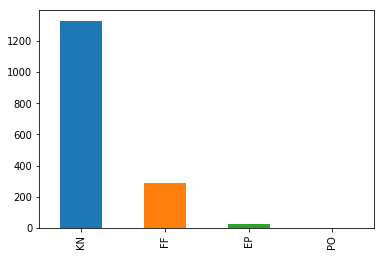

In [26]:
df = pd.DataFrame(data=pitch_tuple_list_2, columns=['Pitcher', 'Pitch Description', 'Pitch Coordinate', 'Pitch Speed', 'Pitch Type'])
df['Pitch Type'].value_counts().plot.bar()

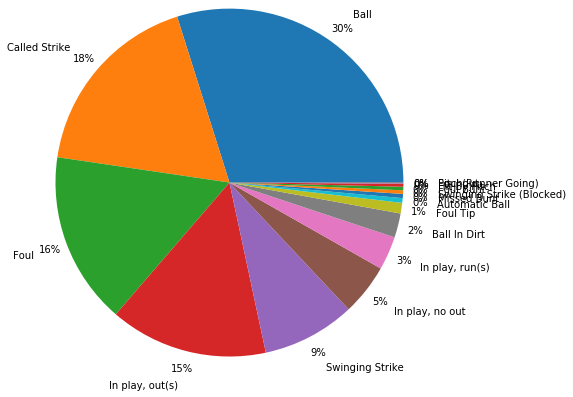

In [27]:
plt.axis('equal')
df['Pitch Description'].value_counts().plot(kind='pie', radius=2, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.ylabel('')
plt.show()

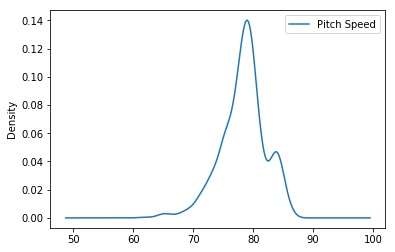

In [28]:
df.dropna(inplace=True)
ax.set_xlim(50, 100)
df.plot.kde()
ax.legend()

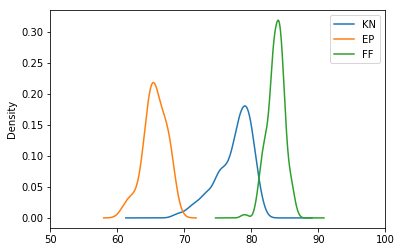

In [29]:
fig, ax = plt.subplots()
ax.set_xlim(50, 100)
for desc in df['Pitch Type'].unique():
    if desc != 'PO':
        s = df[df['Pitch Type'] == desc]['Pitch Speed']
        s.plot.kde(ax=ax, label=desc)

ax.legend()

### Analyze a lineup of pitchers

In [30]:
import datetime
import dateutil.parser
import pytz
pitch_tuple_list_3 = []
for game_id, game in game_list_2017:
    if game.home_team.name == 'Atlanta Braves' and dateutil.parser.parse(game.game_date_str) > datetime.datetime(2017, 3, 31):
        for inning in game.inning_list:
            for appearance in inning.top_half_appearance_list:
                pitch_tuple_list_3.append(
                    (str(appearance.pitcher),
                     str(appearance.batter),
                     len(appearance.out_runners_list),
                     len(appearance.scoring_runners_list),
                     len(appearance.runners_batted_in_list),
                     appearance.scorecard_summary,
                     appearance.got_on_base,
                     appearance.plate_appearance_summary,
                     appearance.plate_appearance_description,
                     appearance.error_str,
                     appearance.inning_outs)
                )
    if game.away_team.name == 'Atlanta Braves' and dateutil.parser.parse(game.game_date_str) > datetime.datetime(2017, 3, 31):
        for inning in game.inning_list:
            if inning.bottom_half_appearance_list:
                for appearance in inning.bottom_half_appearance_list:
                    pitch_tuple_list_3.append(
                        (str(appearance.pitcher),
                         str(appearance.batter),
                         len(appearance.out_runners_list),
                         len(appearance.scoring_runners_list),
                         len(appearance.runners_batted_in_list),
                         appearance.scorecard_summary,
                         appearance.got_on_base,
                         appearance.plate_appearance_summary,
                         appearance.plate_appearance_description,
                         appearance.error_str,
                         appearance.inning_outs)
                    )

df3 = pd.DataFrame(data=pitch_tuple_list_3, columns=['Pitcher',
                                                     'Batter',
                                                     'Out Runners',
                                                     'Scoring Runners',
                                                     'RBIs',
                                                     'Scorecard',
                                                     'On-base?',
                                                     'Plate Summary',
                                                     'Plate Description',
                                                     'Error',
                                                     'Inning Outs'])

df3

,Pitcher,Batter,Out Runners,Scoring Runners,RBIs,Scorecard,On-base?,Plate Summary,Plate Description,Error,Inning Outs
0,26 Mike Foltynewicz,6 Starling Marte,0,0,0,K,False,Strikeout,Starling Marte strikes out swinging.,None,1
1,26 Mike Foltynewicz,55 Josh Bell,0,0,0,F7,False,Flyout,Josh Bell flies out to left fielder Matt Kemp.,None,2
2,26 Mike Foltynewicz,22 Andrew McCutchen,0,0,0,1B,True,Single,Andrew McCutchen singles on a sharp line drive...,None,2
3,26 Mike Foltynewicz,25 Gregory Polanco,0,0,0,L7,False,Lineout,Gregory Polanco lines out to left fielder Matt...,None,3
4,26 Mike Foltynewicz,23 David Freese,0,0,0,P4,False,Pop Out,David Freese pops out to second baseman Brando...,None,1
5,26 Mike Foltynewicz,29 Francisco Cervelli,0,0,0,L9,False,Lineout,Francisco Cervelli lines out to right fielder ...,None,2
6,26 Mike Foltynewicz,5 Josh Harrison,0,0,0,2B,True,Double,Josh Harrison hits a ground-rule double (1) on...,None,2
7,26 Mike Foltynewicz,10 Jordy Mercer,0,0,0,F9,False,Flyout,Jordy Mercer flies out to right fielder Nick M...,None,3
8,26 Mike Foltynewicz,46 Ivan Nova,0,0,0,F9,False,Flyout,Ivan Nova flies out to right fielder Nick Mark...,None,1
9,26 Mike Foltynewicz,6 Starling Marte,0,0,0,HBP,True,Hit By Pitch,Starling Marte hit by pitch.,None,1


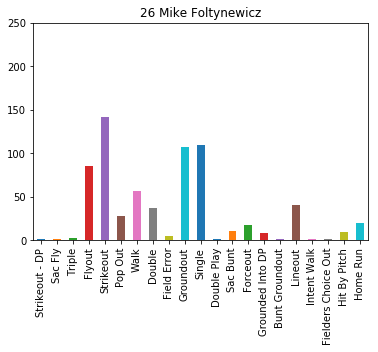

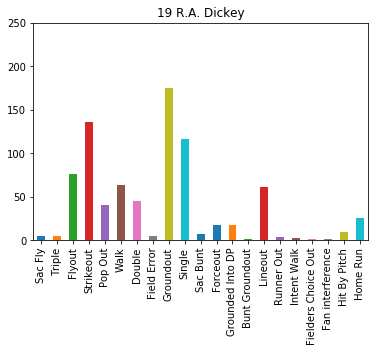

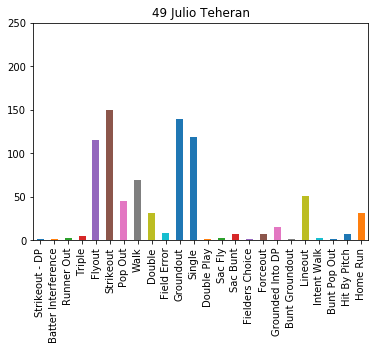

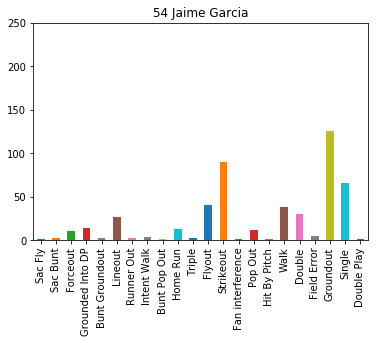

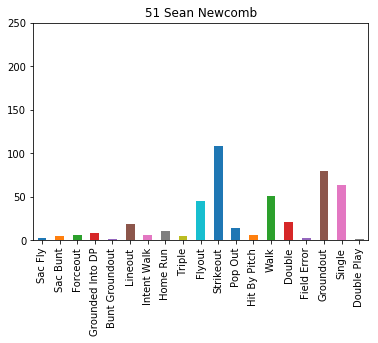

In [31]:
for pitcher in df3['Pitcher'].unique():
    summary = df3[df3['Pitcher'] == pitcher]['Plate Summary']
    s = summary.value_counts(sort=False)
    if len(summary) > 400:
        fig, ax = plt.subplots()
        ax.set_ylim(0, 250)
        s.plot.bar()
        plt.title(pitcher)
        plt.show()


In [32]:
x = []
for pitcher in df3['Pitcher'].unique():
    #f = df3[df3['Pitcher'] == pitcher]['On-base?'].value_counts()[0]
    s = df3[df3['Pitcher'] == pitcher]['On-base?'].value_counts()
    if len(s) == 2:
        f = s[0]
        t = s[1]
        x.append((str(pitcher), f, t))

df4 = pd.DataFrame(data=x, columns=['Pitcher',
                                    'Did not get on base',
                                    'Got on base'])


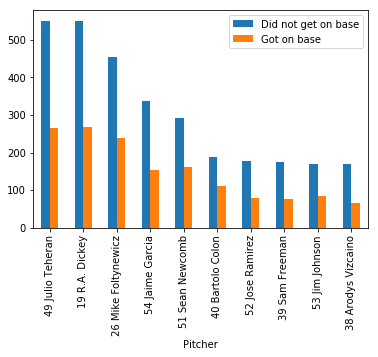

In [33]:
df4.index = df4['Pitcher']
df4.sort_values(by=['Got on base']).nlargest(10, 'Did not get on base').plot.bar()

In [34]:
x = []
for batter in df3['Batter'].unique():
    s = df3[df3['Batter'] == batter]['On-base?']
    if True in s.value_counts():
        t = s.value_counts()[True]
    else:
        t = 0

    if False in s.value_counts():
        f = s.value_counts()[False]
    else:
        f = 0        

    if f != 0 or t != 0:
        success = t / (f + t)
    else:
        success = None

    if f or f == 0:
        x.append((str(batter), success, t, f))

df5 = pd.DataFrame(data=x, columns=['Batter',
                                    'Success',
                                    'Got on base',
                                    'Did not get on base'])


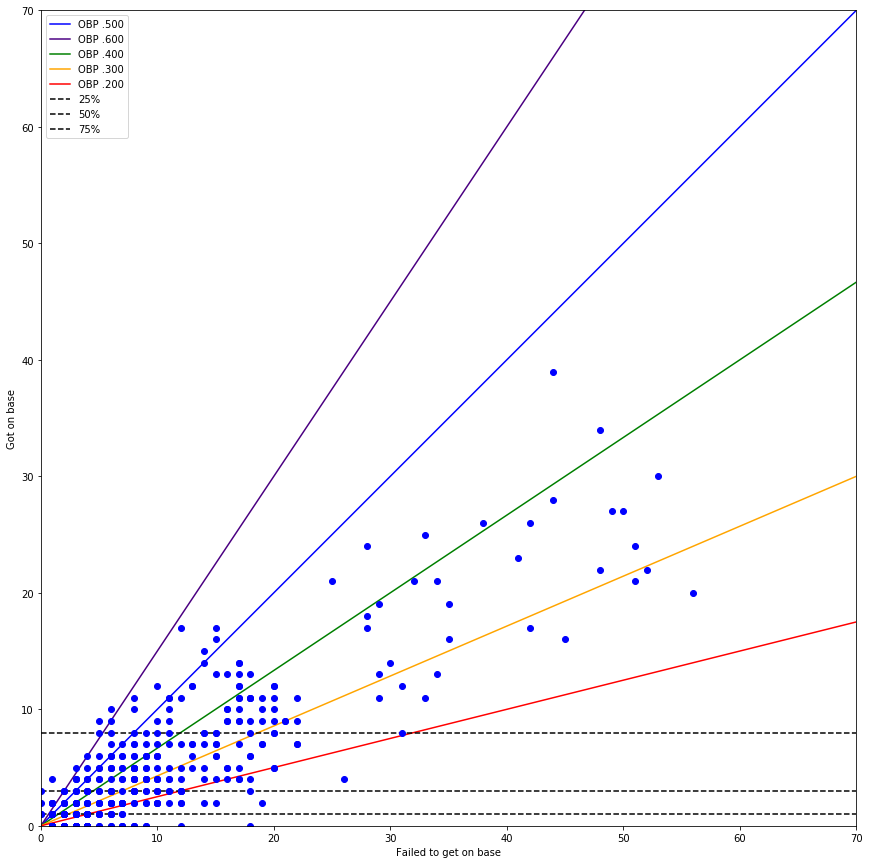

,Batter,Success,Got on base,Did not get on base
18,21 Christian Yelich,0.469880,39,44
109,16 Cesar Hernandez,0.414634,34,48
19,27 Giancarlo Stanton,0.361446,30,53
49,11 Ryan Zimmerman,0.388889,28,44
16,9 Dee Gordon,0.350649,27,50
281,13 Asdrubal Cabrera,0.355263,27,49
46,6 Anthony Rendon,0.382353,26,42
114,37 Odubel Herrera,0.406250,26,38
47,34 Bryce Harper,0.431034,25,33
294,19 Jay Bruce,0.461538,24,28


In [38]:
fig, ax = plt.subplots(figsize=(15,15))
plt.ylim(0, 70)
plt.xlim(0, 70)

lims = [0, 70]
ax.plot(lims, lims, 'k-', alpha=1.0, zorder=0, color="blue", label="OBP .500")
lims_600 = [0, 105]
ax.plot(lims, lims_600, 'k-', alpha=1.0, zorder=0, color="indigo", label="OBP .600")
lims_400 = [0, 46.667]
ax.plot(lims, lims_400, 'k-', alpha=1.0, zorder=0, color="green", label="OBP .400")
lims_300 = [0, 30]
ax.plot(lims, lims_300, 'k-', alpha=1.0, zorder=0, color="orange", label="OBP .300")
lims_200 = [0, 17.5]
ax.plot(lims, lims_200, 'k-', alpha=1.0, zorder=0, color="red", label="OBP .200")

horiz = [1, 1]
ax.plot(lims, horiz, '--', alpha=1.0, zorder=0, color="black", label="25%")
horiz = [3, 3]
ax.plot(lims, horiz, '--', alpha=1.0, zorder=0, color="black", label="50%")
horiz = [8, 8]
ax.plot(lims, horiz, '--', alpha=1.0, zorder=0, color="black", label="75%")


ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set(xlabel="Failed to get on base", ylabel="Got on base")

t = df5['Got on base']
f = df5['Did not get on base']
plt.legend()
b = plt.scatter(f, t, c='b')
plt.show()

df5.sort_values('Got on base', ascending=False)

In [ ]:
df6 = df5[df5['Got on base'] < 1]
df6.count()